# Pair programming Estadística Inferencial

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy import stats
# from scipy.stats import shapiro, ktest,  poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("files/world_data_full_apply_nulos.csv", index_col = 0)

1. Igual que en los ejercicios de la clase invertida, evalúa si las siguientes afirmaciones corresponden a una distribución exponencial o poisson.

In [ ]:
## ¿El tiempo que transcurre entre la llegada de autobuses a una parada sigue una distribución exponencial o de Poisson?
# Exponencial, ya que la utilizamos para ver el tiempo entre eventos

## ¿El número de errores en un artículo de noticias sigue una distribución exponencial o de Poisson?
# Poisson ya que vamos a revisar que ocurreen un intervalo de tiempo fijo

## ¿El tiempo que transcurre entre la llegada de solicitudes de servicio en un restaurante sigue una distribución exponencial o de Poisson?
# Exponencial, ya que la utilizamos para ver el tiempo entre eventos

## ¿El número de accidentes de tráfico en una hora en una ciudad sigue una distribución exponencial o de Poisson?
# Poisson

## ¿El tiempo entre llegadas de llamadas telefónicas a una central de emergencias sigue una distribución exponencial o de Poisson?
# Exponencial

## ¿El número de clientes que ingresan a una tienda en una hora sigue una distribución exponencial o de Poisson?
# Poisson

## ¿El tiempo entre llegadas de correos electrónicos en una bandeja de entrada sigue una distribución exponencial o de Poisson?
# Exponencial

## ¿El número de defectos en una línea de producción por día sigue una distribución exponencial o de Poisson?
# Poisson

## ¿El tiempo que transcurre entre la llegada de taxis en una parada sigue una distribución exponencial o de Poisson?
# Exponencial

## ¿El número de errores de ortografía en un libro de texto sigue una distribución exponencial o de Poisson?
# Poisson

2. Ejercicios intervalo de confianza. Al igual que en el caso del ejercicio de la clase invertida, piensa un motivo por el que sería interesante calcular estos intervalos de confianza para la extracción de insights.


In [4]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [5]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

In [ ]:
# Intervalo de Confianza para la Esperanza de Vida
# Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% para la esperanza de vida promedio de cada continente.
# Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

In [8]:
for continente in df["continent"].unique():

    media_vida = df["life_expectancy"].mean()
    error_vida = stats.sem(df["life_expectancy"], nan_policy="omit")

        # Definir el nivel de confianza (95% en este caso)
    nivel_confianza_vida= 0.95

        # calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
    grados_libertad_vida= len(df["life_expectancy"]) - 1

        # Calcular el valor crítico (utilizando la distribución t de Student)
    valor_critico_vida = stats.t.ppf((1 + nivel_confianza_vida) / 2, df = grados_libertad_vida)

        # Calcular el intervalo de confianza
    limite_inferior_vida= media_vida - valor_critico_vida * error_vida
    limite_superior_vida = media_vida + valor_critico_vida * error_vida

    print(f"\n____________ CONTINENTE:  {continente}   _________________\n")

    print("Intervalo de Confianza para el precio:")
    print(f"Media Muestral: {np.round(media_vida, 2)}")
    print(f"Error Estándar: {np.round(error_vida, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza_vida}")
    print(f"Valor Crítico: {np.round(valor_critico_vida, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior_vida, 2)}, {np.round(limite_superior_vida, 2)})")


____________ CONTINENTE:  Asia   _________________

Intervalo de Confianza para el precio:
Media Muestral: 72.28
Error Estándar: 0.55
Nivel de Confianza: 0.95
Valor Crítico: 1.97
Intervalo de Confianza: (71.2, 73.36)

____________ CONTINENTE:  Europe   _________________

Intervalo de Confianza para el precio:
Media Muestral: 72.28
Error Estándar: 0.55
Nivel de Confianza: 0.95
Valor Crítico: 1.97
Intervalo de Confianza: (71.2, 73.36)

____________ CONTINENTE:  Africa   _________________

Intervalo de Confianza para el precio:
Media Muestral: 72.28
Error Estándar: 0.55
Nivel de Confianza: 0.95
Valor Crítico: 1.97
Intervalo de Confianza: (71.2, 73.36)

____________ CONTINENTE:  Central America   _________________

Intervalo de Confianza para el precio:
Media Muestral: 72.28
Error Estándar: 0.55
Nivel de Confianza: 0.95
Valor Crítico: 1.97
Intervalo de Confianza: (71.2, 73.36)

____________ CONTINENTE:  South America   _________________

Intervalo de Confianza para el precio:
Media Muestr

In [9]:
# Intervalo de Confianza para el PIB
# Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes.

for continente in df["continent"].unique():

    media_PIB = df["cpi"].mean()
    error_PIB = stats.sem(df["cpi"], nan_policy="omit")

        # Definir el nivel de confianza (90% en este caso)
    nivel_confianza_PIB = 0.90

        # calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
    grados_libertad_PIB = len(df["cpi"]) - 1

        # Calcular el valor crítico (utilizando la distribución t de Student)
    valor_critico_PIB = stats.t.ppf((1 + nivel_confianza_PIB) / 2, df = grados_libertad_PIB)

        # Calcular el intervalo de confianza
    limite_inferior_PIB = media_PIB - nivel_confianza_PIB * error_PIB
    limite_superior_PIB = media_PIB + nivel_confianza_PIB * error_PIB

    print(f"\n____________ CONTINENTE:  {continente}   _________________\n")

    print("Intervalo de Confianza para el precio:")
    print(f"Media Muestral: {np.round(media_PIB, 2)}")
    print(f"Error Estándar: {np.round(error_PIB, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza_PIB}")
    print(f"Valor Crítico: {np.round(valor_critico_PIB, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior_PIB, 2)}, {np.round(limite_superior_PIB, 2)})")


____________ CONTINENTE:  Asia   _________________

Intervalo de Confianza para el precio:
Media Muestral: 144.19
Error Estándar: 4.14
Nivel de Confianza: 0.9
Valor Crítico: 1.65
Intervalo de Confianza: (140.47, 147.92)

____________ CONTINENTE:  Europe   _________________

Intervalo de Confianza para el precio:
Media Muestral: 144.19
Error Estándar: 4.14
Nivel de Confianza: 0.9
Valor Crítico: 1.65
Intervalo de Confianza: (140.47, 147.92)

____________ CONTINENTE:  Africa   _________________

Intervalo de Confianza para el precio:
Media Muestral: 144.19
Error Estándar: 4.14
Nivel de Confianza: 0.9
Valor Crítico: 1.65
Intervalo de Confianza: (140.47, 147.92)

____________ CONTINENTE:  Central America   _________________

Intervalo de Confianza para el precio:
Media Muestral: 144.19
Error Estándar: 4.14
Nivel de Confianza: 0.9
Valor Crítico: 1.65
Intervalo de Confianza: (140.47, 147.92)

____________ CONTINENTE:  South America   _________________

Intervalo de Confianza para el precio:


In [12]:
df_asia = df[df["continent"]== "Asia"]


In [14]:
# Intervalo de Confianza para la Tasa de Natalidad
# Contexto: Trabajas en una agencia gubernamental que se ocupa de cuestiones demográficas y deseas determinar el intervalo de confianza al 99% para la tasa de natalidad promedio en Asia.

# Intervalo de Confianza para el PIB
# Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes.

media_tasa_natalidad = df_asia["birth_rate"].mean()
error_tasa_natalidad = stats.sem(df_asia["birth_rate"], nan_policy="omit")

    # Definir el nivel de confianza (99% en este caso)
nivel_confianza_tasa_natalidad = 0.99

    # calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
grados_libertad_tasa_natalidad = len(df_asia["birth_rate"]) - 1

    # Calcular el valor crítico (utilizando la distribución t de Student)
valor_critico_tasa_natalidad = stats.t.ppf((1 + nivel_confianza_PIB) / 2, df = grados_libertad_PIB)

    # Calcular el intervalo de confianza
limite_inferior_tasa_natalidad = media_tasa_natalidad - nivel_confianza_tasa_natalidad * error_tasa_natalidad
limite_superior_tasa_natalidad= media_tasa_natalidad + nivel_confianza_tasa_natalidad * error_tasa_natalidad


print("Intervalo de Confianza para el precio:")
print(f"Media Muestral: {np.round(media_tasa_natalidad, 2)}")
print(f"Error Estándar: {np.round(error_tasa_natalidad, 2)}")
print(f"Nivel de Confianza: {nivel_confianza_tasa_natalidad}")
print(f"Valor Crítico: {np.round(valor_critico_tasa_natalidad, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior_tasa_natalidad, 2)}, {np.round(limite_superior_tasa_natalidad, 2)})")


Intervalo de Confianza para el precio:
Media Muestral: 18.81
Error Estándar: 0.99
Nivel de Confianza: 0.99
Valor Crítico: 1.65
Intervalo de Confianza: (17.83, 19.79)


In [ ]:
# Intervalo de Confianza para la Tasa de Desempleo
# Contexto: Eres un analista de políticas públicas y deseas calcular el intervalo de confianza al 95% para la tasa de desempleo promedio en los países de Oceanía.


In [18]:
df_oceania = df[df["continent"]== "Oceania"]

In [23]:
media_tasa_desempleo = df_oceania["unemployment_rate"].mean()
error_tasa_desempleo = stats.sem(df_oceania["unemployment_rate"], nan_policy="omit")

    # Definir el nivel de confianza (95% en este caso)
nivel_confianza_tasa_desempleo = 0.95

    # calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
grados_libertad_tasa_desempleo = len(df_oceania["unemployment_rate"]) - 1

    # Calcular el valor crítico (utilizando la distribución t de Student)
valor_critico_tasa_desempleo = stats.t.ppf((1 + nivel_confianza_tasa_desempleo) / 2, df = grados_libertad_tasa_desempleo)

    # Calcular el intervalo de confianza
limite_inferior_tasa_desempleo = media_tasa_desempleo - nivel_confianza_tasa_desempleo * error_tasa_desempleo
limite_superior_tasa_desempleo= media_tasa_desempleo + nivel_confianza_tasa_desempleo * error_tasa_desempleo


print("Intervalo de Confianza para el precio:")
print(f"Media Muestral: {np.round(media_tasa_desempleo, 2)}")
print(f"Error Estándar: {np.round(error_tasa_desempleo, 2)}")
print(f"Nivel de Confianza: {nivel_confianza_tasa_desempleo}")
print(f"Valor Crítico: {np.round(valor_critico_tasa_desempleo, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior_tasa_desempleo, 2)}, {np.round(limite_superior_tasa_desempleo, 2)})")

Intervalo de Confianza para el precio:
Media Muestral: 3.79
Error Estándar: 0.87
Nivel de Confianza: 0.95
Valor Crítico: 2.16
Intervalo de Confianza: (2.96, 4.62)


In [ ]:
# Intervalo de Confianza para la Tasa de Impuestos
# Contexto: Trabajas en un ministerio de finanzas y deseas estimar el intervalo de confianza al 90% para la tasa de impuestos promedio en los países de África.

In [27]:
df_Africa = df[df["continent"]== "Africa"]


In [29]:
media_tasa_impuestos = df_Africa["total_tax_rate"].mean()
error_tasa_impuestos = stats.sem(df_Africa["total_tax_rate"], nan_policy="omit")

    # Definir el nivel de confianza (90% en este caso)
nivel_confianza_tasa_impuestos = 0.90

    # calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
grados_libertad_tasa_impuestos = len(df_Africa["total_tax_rate"]) - 1

    # Calcular el valor crítico (utilizando la distribución t de Student)
valor_critico_tasa_impuestos = stats.t.ppf((1 + nivel_confianza_tasa_impuestos) / 2, df = grados_libertad_tasa_impuestos)

    # Calcular el intervalo de confianza
limite_inferior_tasa_impuestos = media_tasa_impuestos - nivel_confianza_tasa_impuestos * error_tasa_impuestos
limite_superior_tasa_impuestos= media_tasa_impuestos + nivel_confianza_tasa_impuestos * error_tasa_impuestos


print("Intervalo de Confianza para el precio:")
print(f"Media Muestral: {np.round(media_tasa_impuestos, 2)}")
print(f"Error Estándar: {np.round(error_tasa_impuestos, 2)}")
print(f"Nivel de Confianza: {nivel_confianza_tasa_impuestos}")
print(f"Valor Crítico: {np.round(valor_critico_tasa_impuestos, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior_tasa_impuestos, 2)}, {np.round(limite_superior_tasa_impuestos, 2)})")

Intervalo de Confianza para el precio:
Media Muestral: 47.77
Error Estándar: 4.04
Nivel de Confianza: 0.9
Valor Crítico: 1.67
Intervalo de Confianza: (44.13, 51.41)


3. Ejercicios prueba de hipótesis: Hasta ahora en la lección y en los ejercicios de la clase invertida os hemos propuesto un contexto y unas hipótesis para entender que es la prueba de hipótesis. Ahora es tu turno, tienes que pensar en 2 hipótesis que quieras aceptar o rechazar usando una prueba de hipótesis en base a los datos que tenemos.

In [72]:
def prueba_hipotesis_fertilidad(*args):
    
    # Mirar si las varianzas son iguales o no
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1]
    else:
        p_valor_varianza = stats.bartlett(*args)[1]
    
    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05

    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa en la tasa de fertilidad entre los continentes.")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de fertilidad entre los continentes..")

In [47]:
# H0: No hay diferencia en la tasa de fertilidad entre Africa y Asia
# H1 : Hay diferencia significativa en la tasa de fertilidad entre Africa y Asia 

In [73]:
# filtramos los datos para obtener dos grupos: educación básica 4 años y educación secundaria
grupo_1 = df[df['continent'] == "Africa" ]["fertility_rate"]
grupo_2 = df[df['continent'] == "Asia"]["fertility_rate"]

# llamamos a la función que hemos creado
prueba_hipotesis_fertilidad(grupo_1, grupo_2)


No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de fertilidad entre los continentes..


In [74]:
# filtramos los datos para obtener dos grupos: educación básica 4 años y educación secundaria
grupo_1 = df[df['continent'] == "Africa" ]["fertility_rate"]
grupo_2 = df[df['continent'] == "Europa"]["fertility_rate"]

# llamamos a la función que hemos creado
prueba_hipotesis_fertilidad(grupo_1, grupo_2)

No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de fertilidad entre los continentes..


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'Central America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania'),
  Text(6, 0, 'North America')])

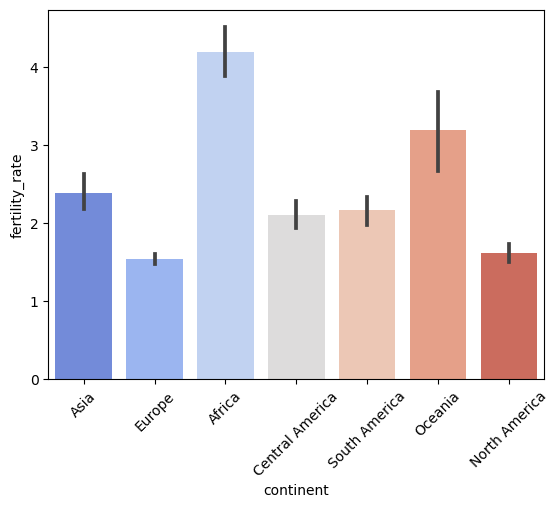

In [81]:
sns.barplot(x="continent", y="fertility_rate", data=df,  palette = "coolwarm")
plt.xticks(rotation = 45)


In [ ]:
# H0: No hay diferencia en la tasa de densidad entre continentes entre Africa y Asia
# H1 : Hay diferencia significativa en la densidad de poblacion entre Africa y Asia 

In [78]:
grupo_1 = df[df['continent'] == "North America" ]["density"]
grupo_2 = df[df['continent'] == "Central America"]["density"]

# llamamos a la función que hemos creado
prueba_hipotesis_fertilidad(grupo_1, grupo_2)

No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de fertilidad entre los continentes..


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'Central America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania'),
  Text(6, 0, 'North America')])

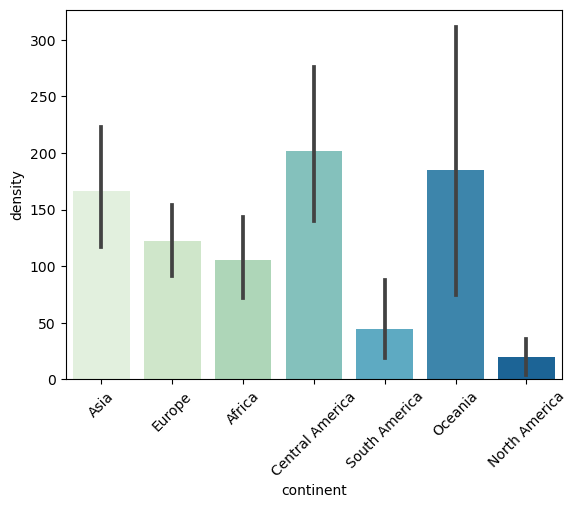

In [80]:
sns.barplot(x="continent", y="density", data=df,  palette = "GnBu")
plt.xticks(rotation = 45)